<H1>
<center> Indian Institute of Technology, Goa <center>
<br>
<center> Machine learning CS331 </center>
<br>
<center> Course Instructor: Dr Satyanath Bhat <center>
<br>
<center> Lab Assignment 1 </center> 
</H1>
<H2>
<center> GroupID: RuAsRaDe </center>
<br>
<center> Group Details </center>
</H2>
    
| Name             | Roll No.|
|------------------|---------|
| Rujul Dwivedi | 2103319 |
| Ashish Kumar Rathore | 2103304 |
| Rahul Saini   | 2103318 |
| Deepak Kumar  | 2103308 |

### Import required libraries

In [32]:
import numpy as np # for numerical computation
from sklearn.datasets import fetch_california_housing , load_iris, load_digits # for loading the dataset
from sklearn.preprocessing import Normalizer # for normalizing the data
from sklearn.model_selection import train_test_split # for splitting the data
from tqdm import trange # for progress bar
import matplotlib.pyplot as plt # for plotting

## Question 1 

1. a) Matrix Multiplication Layer
2. b) Bias Addition Layer 
3. c) Mean Squared loss layer 
4. d) Softmax Activation 
5. e) Sigmoid Activation 
6. f) Cross Entropy Loss Layer 
7. Extra) Linear Activation 

**1. Matrix Multiplication Layer**

In [33]:
class MultiplicationLayer : # Layer 1
    """
    Inputs : X ∈ R^(1xd) , W ∈ R^(dxK) # X is the input data, W is the weight matrix
    """
    def __init__(self, X, W) : # This is the constructor of the class
        self.X = X 
        self.W = W 

    def __str__(self,): # This is the string representation of the class
        return " An instance of Muliplication Layer."

    def forward(self):  # This is the forward pass of the layer
        self.Z = np.dot(self.X, self.W) # Z = XW

    def backward(self): # This is the backward pass of the layer
        self.dZ_dW = (self.X).T  # dZ/dW 
        self.dZ_daZ_prev = self.W  # dZ/dX 

---

**2 Bias Addition Layer**

In [34]:
class BiasAdditionLayer : # Layer 2
    """
    Inputs : Z ∈ R^(1xK), B ∈ R^(1xK) # Z is the input data, B is the bias matrix
    """
    def __init__(self, Z : np.ndarray , bias : np.ndarray ): # This is the constructor of the class
        self.B = bias
        self.Z = Z
    
    def __str__(self,): # This is the string representation of the class
        return "An instance of Bias Addition Layer."
    
    def forward(self,): # This is the forward pass of the layer
        self.Z = self.Z + self.B #Z = Z + B
    
    def backward(self,): # This is the backward pass of the layer
        self.dZ_dB = np.identity( self.B.shape[1] ) #dZ/dB

---

**3. Mean Squared Loss Layer**

In [35]:
class MeanSquaredLossLayer : # Layer 3
    """
    Inputs : Y ∈ R^(1xK) , Y_hat ∈ R^(1xK) # Y is the true output, Y_hat is the predicted output
    # aZ denotes output of previous activation layer 
    """
    def __init__(self, Y : np.ndarray , Y_hat : np.ndarray): # This is the constructor of the class
        self.Y = Y 
        self.aZ = Y_hat 
    
    def __str__(self,): # This is the string representation of the class
        return "An instance of Mean Squared Loss Layer"
    
    def forward(self, ): # This is the forward pass of the layer
        self.L = np.mean( ( self.aZ - self.Y)**2 ) #L = (1/n) * || Y_hat - Y||**2 
        
    def backward(self,): # This is the backward pass of the layer
        self.dL_daZ = (2/len(self.Y))*(self.aZ - self.Y).T   #dL/dY_hat = (2/n)*(Y_hat - Y).T      

---

**4. Soft Max Activation**

In [36]:
class SoftMaxActivation : # Layer 4
    """
    Input : a numpy array Z ∈ R^(1XK)  # Z is the input data
    """
    def __init__(self, Z): # This is the constructor of the class
        self.Z = Z 
        
    def __str__(self,): # This is the string representation of the class
        return "An instance of Softmax Activation Layer"
        
    def forward(self,): # This is the forward pass of the layer
        self.aZ = self.softmax(self.Z) #aZ = softmax(Z).T
    
    def backward(self,): # This is the backward pass of the layer
        self.daZ_dZ = np.diag( self.aZ.reshape(-1) ) - (self.aZ.T)@( (self.aZ))  #daZ/dZ  = diag(aZ) - sZ*transpose(aZ)
        # Shape = (K,K) where K = len( sZ )
    
    @staticmethod # We are making this method static as it does not depend on the object state and only on the input Z and why are we doing this? Because we can call this method without creating an instance of the class
    def softmax(Z : np.ndarray): # This is the softmax function
        max_Z = np.max( Z, axis=1 ,keepdims=True ) #max_Z = max(Z)
        return (np.exp(Z - max_Z ))/np.sum( np.exp(Z - max_Z), axis=1 , keepdims=True) #softmax(Z) = exp(Z - max_Z)/sum(exp(Z - max_Z))

---

**5. Sigmoid Activation**

In [37]:
class SigmoidActivation : # Layer 5
    """
    Input : a numpy array Z ∈ R^(Kx1) # Z is the input data
    """
    
    def __init__(self,Z ): # This is the constructor of the class
        self.Z = Z 
    
    def __str__(self,): # This is the string representation of the class
        return "An instance of Sigmoid Activation Layer"
    
    def forward(self,): # This is the forward pass of the layer
        self.aZ = self.sigmoid( self.Z )  # aZ = sigmoid( Z )
    
    def backward(self,): # This is the backward pass of the layer
        diag_entries = np.multiply(self.aZ, 1-self.aZ).reshape(-1) #aZ_i*(1-aZ_i)
        self.daZ_dZ = np.diag(diag_entries) #daZ/dZ = diag(aZ_i*(1-aZ_i))
    
    @staticmethod # We are making this method static as it does not depend on the object state and only on the input Z and why are we doing this? Because we can call this method without creating an instance of the class
    def sigmoid( Z : np.ndarray ) : # This is the sigmoid function
        return  1./(1 + np.exp(-Z) ) #sigmoid(Z) = 1/(1 + exp(-Z))

---

In [38]:
# implement combination of sigmoid and softmax activation function
class SigmoidSoftmaxActivation : # Combination of Layer 5 and Layer 4
    def __init__(self,Z ): # This is the constructor of the class
        self.Z = Z # Z is the input data
    
    def __str__(self,): # This is the string representation of the class
        return "An instance of Sigmoid Activation Layer"
    
    def forward(self,): # This is the forward pass of the layer
        self.aZ = self.sigmoid( self.Z )  # sigmoid calculation
    
    def backward(self,): # This is the backward pass of the layer
        diag_entries = np.multiply(self.aZ, 1-self.aZ).reshape(-1)
        self.daZ_dZ = np.diag(diag_entries) 
    
    @staticmethod # We are making this method static as it does not depend on the object state and only on the input Z and why are we doing this? Because we can call this method without creating an instance of the class
    def sigmoid( Z : np.ndarray ) : # This is the sigmoid function
        return  1./(1 + np.exp(-Z) ) #sigmoid(Z) = 1/(1 + exp(-Z))

**6. Cross Entropy Loss Layer**

In [39]:
class CrossEntropyLossLayer :  # Layer 6
    """
    Inputs : Y ∈ R^(1xK) , Y_pred ∈ R^(1xK) # Y is the true output, Y_pred is the predicted output
    """    
    def __init__(self, Y , Y_pred): # This is the constructor of the class
        self.Y = Y
        self.aZ = Y_pred
        self.epsilon = 1e-40  
        
    
    def __str__(self, ): # This is the string representation of the class
        return "An instance of Cross Entropy Loss Layer"
    
    def forward(self, ): # This is the forward pass of the layer
        self.L = - np.sum( self.Y * np.log(self.aZ+self.epsilon) ) #L = -1 * dot product of Y & log(Y_pred)
        
    def backward(self, ): # This is the backward pass of the layer
        self.dL_daZ = -1*(self.Y/(self.aZ + self.epsilon)).T # dL/dY_pred ∈ R^(Kx1)

**<Extra> //For MSE//**
**Linear Activation**

In [40]:
class LinearActivation : # Extra Layer (for MSE Loss Layer)
    """
    Input : Z ∈ R^(1xn) # Z is the input data
    """
    def __init__(self, Z): # This is the constructor of the class
        self.Z = Z 
        
    def __str__(self,): # This is the string representation of the class
        return "An instance of Linear Activation."
    
    def forward(self, ): # This is the forward pass of the layer
        self.aZ = self.Z  # aZ = Z
    
    def backward(self,): # This is the backward pass of the layer
        self.daZ_dZ = np.identity( self.Z.shape[1] ) #daZ/dZ = I

## Question 2 & 3 

- Question 2 :  California Housing Price Prediction 
- Question 3 :  IRIS Dataset

**Load Data and Train Test Split**

In [41]:
def load_data(dataset_name='california', 
             normalize_X=False, 
             normalize_y=False,
             one_hot_encode_y = False, 
             test_size=0.2): # This function is used to load the dataset
    if dataset_name == 'california' : 
        data = fetch_california_housing() # Load the california housing dataset
    elif dataset_name == 'iris' : 
        data = load_iris() # Load the iris dataset
    elif dataset_name == 'mnist':
        data = load_digits() # Load the mnist dataset
        data['data'] = 1*(data['data']>=8) # Binarize the mnist dataset

    X = data['data'] # X is the input data which we are clipping from the data's dictionary column name 'data'
    y = data['target'].reshape(-1,1) # y is the output data which we are clipping from the data's dictionary column name 'target'
    
    if normalize_X == True : # normalising the input data to make the training process faster
        normalizer = Normalizer() # Create an instance of the normalizer
        X  = normalizer.fit_transform(X) # Normalize the input data
    
    if normalize_y == True : # normalising the output data to make the training process faster
        normalizer = Normalizer() # Create an instance of the normalizer
        y = normalizer.fit_transform(y) # Normalize the output data
    
# normalising makes the training process faster and more accurate because the range of the input and output data is reduced to a smaller range
        
    if one_hot_encode_y == True : # one hot encode the output data to make it suitable for classification problems
        y = np.eye(3)[y.reshape(-1)]# One hot encode the output data

# one hot encoding is used to convert the output data into a binary matrix because the output data is in the form of a vector and we need to convert it into a binary matrix to make it suitable for classification problems

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size) # Split the data into training and testing data according to the test size
    return X_train, y_train, X_test, y_test # Return the training and testing data

**Stochastic Gradient Descent ( SGD )**

In [42]:
# stochastic gradient descent is used to train the model and it is a type of gradient descent in which instead of using the entire dataset to compute the gradient of the cost function in each iteration, it uses only a randomly chosen sample subset of the data for each iteration.

def forward_pass(X_sample, Y_sample, W, B, activation='linear', loss='mean_squared'): # This function is used to perform the forward pass
    multiply_layer = MultiplicationLayer(X_sample, W) # Create an instance of the multiplication layer
    multiply_layer.forward() # Perform the forward pass of the multiplication layer

    bias_add_layer = BiasAdditionLayer(multiply_layer.Z, B) # Create an instance of the bias addition layer
    bias_add_layer.forward() # Perform the forward pass of the bias

    if activation == 'linear' : 
        activation_layer = LinearActivation(bias_add_layer.Z) # Create an instance of the linear activation layer
    elif activation == 'softmax': 
        activation_layer = SoftMaxActivation(bias_add_layer.Z) # Create an instance of the softmax activation layer

    activation_layer.forward() # Perform the forward pass of the activation layer

    if loss == 'mean_squared' :
        loss_layer = MeanSquaredLossLayer(Y_sample, activation_layer.aZ ) # Create an instance of the mean squared loss layer
    elif loss=='cross_entropy' : 
        loss_layer = CrossEntropyLossLayer(Y_sample, activation_layer.aZ ) # Create an instance of the cross entropy loss layer
    
    loss_layer.forward() # Perform the forward pass of the loss

    return multiply_layer, bias_add_layer, activation_layer, loss_layer # Return the layers

def backward_pass(multiply_layer, bias_add_layer, activation_layer, loss_layer):  # This function is used to perform the backward pass

    loss_layer.backward() # Perform the backward pass of the loss
    activation_layer.backward() # Perform the backward pass of the activation
    bias_add_layer.backward() # Perform the backward pass of the bias
    multiply_layer.backward() # Perform the backward pass of the multiplication

    return loss_layer, activation_layer, bias_add_layer, multiply_layer  # Return the layers


def StochasticGradientDescent( X_train,
                               y_train, 
                               X_test, 
                               y_test, 
                               inp_shape = 1,
                               out_shape = 1,  
                               n_iterations = 10000,
                               learning_rate = 0.01,
                               activation = 'linear',
                               loss = 'mean_squared',
                               seed = 42,
                               task='regression' 
                            ): # This function is used to perform stochastic gradient descent

    np.random.seed(seed) # Set the seed for reproducibility

    W_shape = ( inp_shape,  out_shape ) # W is the weight matrix
    B_shape = ( 1, out_shape ) # B is the bias matrix

    W = np.random.random(W_shape) # Initialize W
    B  = np.random.random(B_shape) # Initialize B

    iterations = trange(n_iterations ,desc="Training...", ncols=100) # Create an instance of the tqdm class for the progress bar 

# here we are using trange instead of range because we want to display the progress bar and ncols is used to set the width of the progress bar
# below is the implementation of stochastic gradient descent algorithm where we are updating the weights and biases in each iteration and the X, y are the input and output data respectively chosen randomly from the training data
    for iteration, _ in enumerate(iterations) : # Iterate through the number of iterations
        randomIndx = np.random.randint( len(X_train) ) # Generate a random index which is less than the length of the training data used to choose the indexes randomly from the training data which will be used as input and output data for the forward and backward pass
        X_sample = X_train[randomIndx, :].reshape(1, inp_shape) # Get the input sample
        Y_sample = y_train[randomIndx, :].reshape(1, out_shape) # Get the output sample

        multiply_layer, bias_add_layer, activation_layer, loss_layer = forward_pass(X_sample, Y_sample, W, B, activation,loss) # Perform the forward pass

        # aZ means output of some activation function applied on Z 
        
        loss_layer, activation_layer, bias_add_layer, multiply_layer = backward_pass(multiply_layer, bias_add_layer, activation_layer, loss_layer) # Perform the backward pass
        
        dL_daZ = loss_layer.dL_daZ # dL/dY_pred
        dL_dZ = np.dot( activation_layer.daZ_dZ, dL_daZ ) # dL/dZ
        dL_dW = np.dot( multiply_layer.dZ_dW , dL_dZ.T) # dL/dW
        dL_dB = np.dot( bias_add_layer.dZ_dB, dL_dZ).T # dL/dB

        W -=  learning_rate*dL_dW # Update W
        B -=  learning_rate*dL_dB # Update B
        
        if iteration%1000 == 0 : # Print the loss every 1000 iterations
            iterations.set_description( "Sample Error : %0.5f"%loss_layer.L, refresh=True )
    
    # Run forward pass for train and test data and check accuracy/error

# below is the implementation of the regression task where we are calculating the mean squared loss error for the training and testing data

    if task =='regression': # If the task is regression, the loss layer is a mean squared loss layer
        if isinstance(loss_layer, MeanSquaredLossLayer) : # If the loss layer is a mean squared loss layer
            _ , _, _,  loss_layer = forward_pass( X_train, y_train , W, B, activation, loss) #_,_,_ means we are not using these values
            print("Mean Squared Loss Error (Train Data)  : %0.5f"% loss_layer.L) # Print the mean squared loss error for the training data
                        
            _ , _, _,  loss_layer = forward_pass( X_test, y_test , W, B, activation, loss) #_,_,_ means we are not using these values
            print("Mean Squared Loss error (Test Data) : %0.5f"%loss_layer.L) # Print the mean squared loss error for the testing data

# below is the implementation of the classification task where we are calculating the accuracy of the model for the training and testing data
    
    if task =='classification': # If the task is classification, the loss layer is a cross entropy loss layer
        if isinstance(loss_layer, CrossEntropyLossLayer):  # If the loss layer is a cross entropy loss layer
            y_true = np.argmax(y_train, axis=1) # Get the true output
            _, _, _, loss_layer = forward_pass( X_train, y_train , W, B, activation, loss) #_,_,_ means we are not using these values
            y_pred = np.argmax( loss_layer.aZ, axis=1) # Get the predicted output

            acc = 1*(y_pred == y_true) # Calculate the accuracy
            print("Classification Accuracy (Training Data ): {0}/{1} = {2} %".format(sum(acc), len(acc), sum(acc)*100/len(acc))) # {0}/{1} = {2} % means print 0/1 = 2 % 

# y_true is calculated by taking the maximum value of the output data and y_pred is calculated by taking the maximum value of the predicted output data
# this is because the values are one hot encoded and so the true output is the maximum value of the output data (whic will be 1 and the others will be 0)

            y_true = np.argmax(y_test,axis=1) # Get the true output
            _, _, _, loss_layer = forward_pass( X_test, y_test , W, B, activation, loss) #_,_,_ means we are not using these values
            y_pred = np.argmax( loss_layer.aZ, axis=1) # Get the predicted output

            acc = 1*(y_pred == y_true) # Calculate the accuracy
            print("Classification Accuracy (Testing Data ): {0}/{1} = {2} %".format(sum(acc), len(acc), sum(acc)*100/len(acc))) # {0}/{1} = {2} % means print 0/1 = 2 %

# isinstance() function returns True if the specified object is of the specified type, otherwise False and we are not using the values _ , _, _ because we are only interested in the loss_layer



---

### Question 2

In [43]:
X_train, y_train, X_test, y_test  = load_data('california', normalize_X=True, test_size=0.2) # Load the california housing dataset

In [44]:
StochasticGradientDescent(X_train, y_train, X_test, y_test, inp_shape=X_train.shape[1], out_shape=y_train.shape[1], task='regression') # Perform stochastic gradient descent

Sample Error : 0.39579: 100%|███████████████████████████████| 10000/10000 [00:01<00:00, 8387.39it/s]

Mean Squared Loss Error (Train Data)  : 1.32414
Mean Squared Loss error (Test Data) : 1.35248


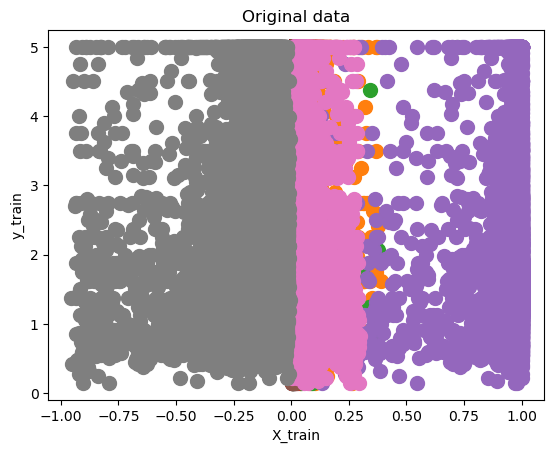

In [45]:
# Plot the original data
plt.plot(X_train, y_train, 'o', label='Original data', markersize=10)
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Original data')
plt.show()


### Question 3

In [46]:
X_train, y_train, X_test, y_test = load_data('iris',normalize_X=True, one_hot_encode_y=True) # Load the iris dataset

In [47]:
StochasticGradientDescent(X_train,y_train,X_test,y_test, inp_shape=X_train.shape[1], \
                          out_shape=y_train.shape[1], 
                          n_iterations=5000,
                          learning_rate=0.001,
                          activation='softmax',
                          task='classification',
                          loss='cross_entropy') # Perform stochastic gradient descent

Sample Error : 0.91044: 100%|█████████████████████████████████| 5000/5000 [00:00<00:00, 5880.28it/s]

Classification Accuracy (Training Data ): 84/120 = 70.0 %
Classification Accuracy (Testing Data ): 16/30 = 53.333333333333336 %


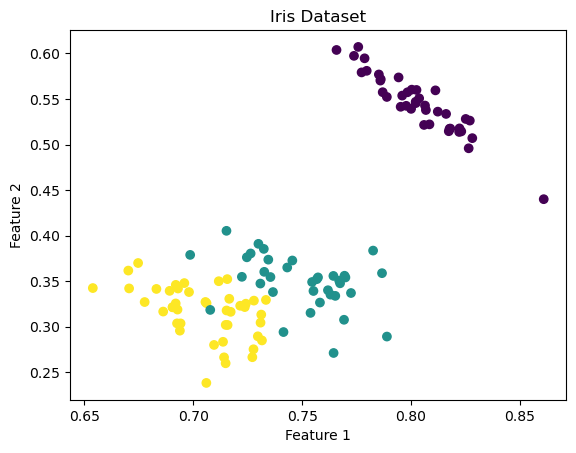

In [48]:
# plot the first two features of iris dataset 
plt.scatter(X_train[:,0], X_train[:,1], c=np.argmax(y_train, axis=1))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Iris Dataset')
plt.show()